In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport



In [3]:


# Load the dataset into a pandas DataFrame

data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic copy.csv")

# Mapping for target variable levels
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Obesity_Type_I': 2,
    'Obesity_Type_II': 3,
    'Obesity_Type_III': 4,
    'Overweight_Level_I': 5,
    'Overweight_Level_II': 6
}

# Replace target variable values with integers
data['NObeyesdad'] = data['NObeyesdad'].map(target_mapping)

# Mapping for 'CALC' variable levels
calc_mapping = {
    'Always': 3,
    'Frequently': 2,
    'Sometimes': 1,
    'no': 0
}

# Replace 'CALC' variable values with integers
data['CALC'] = data['CALC'].map(calc_mapping)


# Mapping for 'MTRANS' variable levels
mtrans_mapping = {
    'Automobile': 0,
    'Bike': 1,
    'Motorbike': 2,
    'Public_Transportation': 3,
    'Walking': 4
}

# Replace 'MTRANS' variable values with integers
data['MTRANS'] = data['MTRANS'].map(mtrans_mapping)

# Mapping for 'CAEC' variable levels
caec_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Replace 'CAEC' variable values with integers
data['CAEC'] = data['CAEC'].map(caec_mapping)

# Mapping for 'SMOKE' variable levels
smoke_mapping = {
    'no': 0,
    'yes': 1
}

# Replace 'SMOKE' variable values with integers
data['SMOKE'] = data['SMOKE'].map(smoke_mapping)

# Mapping for 'FAVC' variable levels
favc_mapping = {
    'no': 0,
    'yes': 1
}

# Replace 'FAVC' variable values with integers
data['FAVC'] = data['FAVC'].map(favc_mapping)

scc_mapping = {
    'no': 0,
    'yes': 1
}

# Replace 'FAVC' variable values with integers
data['SCC'] = data['SCC'].map(favc_mapping)

# Mapping for 'family_history_with_overweight' variable levels
family_history_mapping = {
    'no': 0,
    'yes': 1
}

# Replace 'family_history_with_overweight' variable values with integers
data['family_history_with_overweight'] = data['family_history_with_overweight'].map(family_history_mapping)

# Mapping for 'Gender' variable levels
gender_mapping = {
    'Female': 0,
    'Male': 1
}

# Replace 'Gender' variable values with integers
data['Gender'] = data['Gender'].map(gender_mapping)

# You can examine the model parameters or feature importance depending on the type of Naive Bayes used


In [4]:
data

Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0        0   2.0  3.0     1      0  2.000000    0  0.000000  1.000000     0   
1        0   3.0  3.0     1      1  3.000000    1  3.000000  0.000000     1   
2        0   2.0  3.0     1      0  2.000000    0  2.000000  1.000000     2   
3        0   3.0  3.0     1      0  2.000000    0  2.000000  0.000000     2   
4        0   2.0  1.0     1      0  2.000000    0  0.000000  0.000000     1   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2106     1   3.0  3.0     1      0  1.728139    0  1.676269  0.906247     1   
2107     1   3.0  3.0     1      0  2.005130    0  1.341390  0.599270     1   
2108     1   3.0  3.0     1      0  2.054193    0  1.414209  0.646288     1   
2109     1   3.0  3.0     1      0  2.852339    0  1.139107  0.586035     1   
2110     1   3.0  3.0     1      0  2.863513    0  1.026452  0.714137     1   

      MTRANS  NObeyesdad  
0          3           1  
1          3           1  
2          3           1  
3          4           5  
4          3           6  
...      ...         ...  
2106       3           4  
2107       3           4  
2108       3           4  
2109       3           4  
2110       3           4  

[2111 rows x 17 columns]

In [4]:
# Generate the data profiling report
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Naive Bayes

In [5]:

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['NObeyesdad'])  # Features
y = data['NObeyesdad']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = nb_model.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analyze the effect of different variables on the class variable using the classifier's learned model

Accuracy: 0.640661938534279

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        56
           1       0.68      0.34      0.45        62
           2       0.44      0.64      0.52        78
           3       0.66      0.91      0.77        58
           4       1.00      1.00      1.00        63
           5       0.49      0.30      0.37        56
           6       0.57      0.32      0.41        50

    accuracy                           0.64       423
   macro avg       0.65      0.63      0.62       423
weighted avg       0.64      0.64      0.62       423



In a Naive Bayes model, the concept of feature importance is a bit different compared to models like Decision Trees or ensemble methods like Random Forest or XGBoost. Since Naive Bayes assumes that features are conditionally independent given the class, it doesn't directly provide feature importances like some other models.



In [6]:
# Assuming nb_model is the trained Gaussian Naive Bayes model

# Get the feature names
feature_names = X.columns

# Create a DataFrame to store conditional probabilities
conditional_probabilities_df = pd.DataFrame(index=feature_names, columns=nb_model.classes_)

# Fill the DataFrame with conditional probabilities
for i, class_ in enumerate(nb_model.classes_):
    prob = nb_model.theta_[i]  # Mean of each feature for the class
    conditional_probabilities_df[class_] = prob

# Transpose the DataFrame for better visualization
conditional_probabilities_df = conditional_probabilities_df.T

# Print the top N most "important" features for each class
top_n = 5  # Change this number to get more or fewer top features
for class_ in nb_model.classes_:
    class_conditional_probs = conditional_probabilities_df.loc[class_].sort_values(ascending=False)
    top_features = class_conditional_probs.head(top_n)
    print(f"Top {top_n} Most Important Features for Class '{class_}':")
    print(top_features)
    print()


Top 5 Most Important Features for Class '0':
Weight    49.965209
Age       19.800311
NCP        2.903896
MTRANS     2.486111
FCVC       2.484653
Name: 0, dtype: float64

Top 5 Most Important Features for Class '1':
Weight    61.958667
Age       21.866667
NCP        2.742222
MTRANS     2.631111
FCVC       2.346667
Name: 1, dtype: float64

Top 5 Most Important Features for Class '2':
Weight    92.377944
Age       26.016196
NCP        2.438956
FCVC       2.194625
CH2O       2.093482
Name: 2, dtype: float64

Top 5 Most Important Features for Class '3':
Weight    115.412337
Age        28.476600
NCP         2.748559
FCVC        2.384053
MTRANS      1.979079
Name: 3, dtype: float64

Top 5 Most Important Features for Class '4':
Weight    120.697932
Age        23.501116
FCVC        3.000000
NCP         3.000000
MTRANS      2.988506
Name: 4, dtype: float64

Top 5 Most Important Features for Class '5':
Weight    74.560114
Age       23.361154
NCP        2.477418
MTRANS     2.358974
FCVC       2.25

# Decision Tree


In [7]:







# Train a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)



# Predict the class labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analyze the effect of different variables on the class variable using the classifier's learned model
# You can examine feature importance using clf.feature_importances_


Accuracy: 0.9456264775413712

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.90      0.89      0.89        62
           2       0.95      0.95      0.95        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.90      0.93      0.91        56
           6       0.98      0.92      0.95        50

    accuracy                           0.95       423
   macro avg       0.95      0.94      0.95       423
weighted avg       0.95      0.95      0.95       423



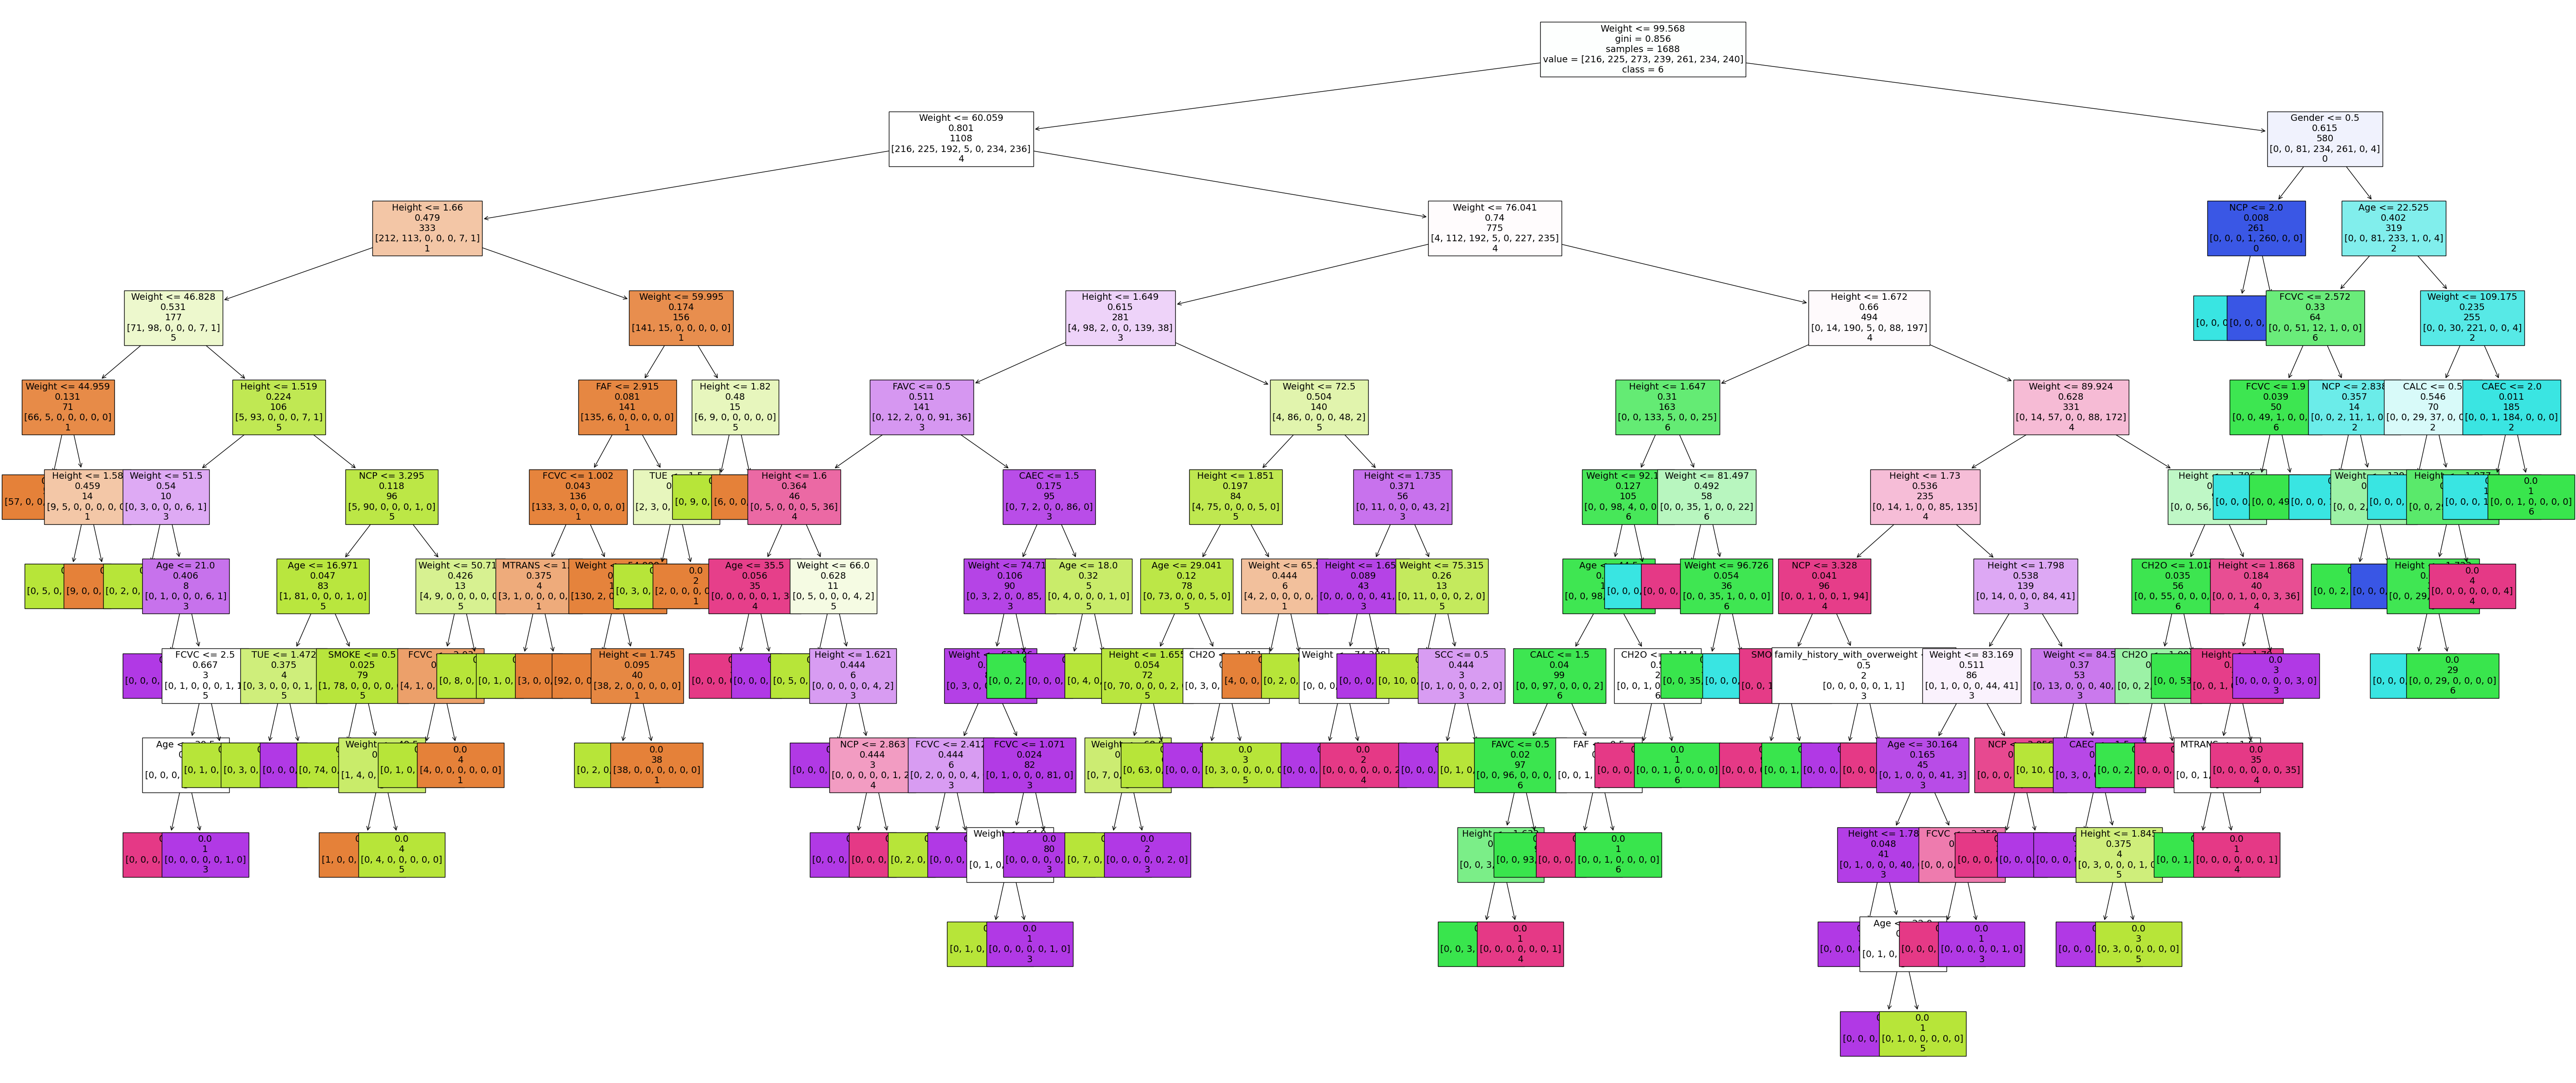

In [8]:
plt.figure(figsize=(70,30))
plot_tree(clf, filled=True, feature_names=[str(col) for col in X.columns], class_names=[str(cls) for cls in data['NObeyesdad'].unique()],fontsize=14, label='root')
plt.show()



In [9]:


# Get feature importances
feature_importances = clf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features
top_n = 10  # Change this number to get more or fewer top features
top_features = feature_importance_df.head(top_n)

print("Top", top_n, "Most Important Features:")
print(top_features)


Top 10 Most Important Features:
   Feature  Importance
3   Weight    0.483157
2   Height    0.219078
0   Gender    0.156778
1      Age    0.042765
5     FAVC    0.027105
14    CALC    0.021014
6     FCVC    0.016787
7      NCP    0.010654
8     CAEC    0.007944
10    CH2O    0.004126


# Logistic Regression

In [10]:

# Create the Logistic Regression model with OvR strategy for multi-class
logreg_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)

# Train the model
logreg_ovr.fit(X_train, y_train)

# Make predictions
y_pred = logreg_ovr.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analyze the effect of different variables on the class variable using logistic regression coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': logreg_ovr.coef_[0]})
print("\nLogistic Regression Coefficients:")
print(coefficients)


Accuracy: 0.7399527186761229

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        56
           1       0.80      0.39      0.52        62
           2       0.71      0.68      0.69        78
           3       0.77      1.00      0.87        58
           4       1.00      1.00      1.00        63
           5       0.59      0.64      0.62        56
           6       0.49      0.52      0.50        50

    accuracy                           0.74       423
   macro avg       0.74      0.74      0.73       423
weighted avg       0.74      0.74      0.73       423


Logistic Regression Coefficients:
                          Variable  Coefficient
0                           Gender     1.450180
1                              Age    -0.111746
2                           Height     4.123064
3                           Weight    -0.457135
4   family_history_with_overweight     0.455668
5                          

In [11]:
# Assuming logreg_model is the trained Logistic Regression model

# Get feature coefficients
feature_coefficients = logreg_ovr.coef_[0]

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature coefficients
feature_coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': feature_coefficients
})

# Calculate the absolute value of coefficients for ranking
feature_coefficients_df['Absolute Coefficient'] = np.abs(feature_coefficients_df['Coefficient'])

# Sort the features by absolute coefficient in descending order
feature_coefficients_df = feature_coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the top N most important features
top_n = 10  # Change this number to get more or fewer top features
top_features = feature_coefficients_df.head(top_n)

print("Top", top_n, "Most Important Features (Ranked by Coefficient Magnitude):")
print(top_features)


Top 10 Most Important Features (Ranked by Coefficient Magnitude):
                           Feature  Coefficient  Absolute Coefficient
2                           Height     4.123064              4.123064
0                           Gender     1.450180              1.450180
6                             FCVC     0.894492              0.894492
7                              NCP     0.861365              0.861365
11                             SCC    -0.675239              0.675239
5                             FAVC     0.508828              0.508828
3                           Weight    -0.457135              0.457135
4   family_history_with_overweight     0.455668              0.455668
10                            CH2O     0.430999              0.430999
9                            SMOKE    -0.397225              0.397225


# Random Forests

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analyze the effect of different variables on the class variable using the Random Forest feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importances:")
print(feature_importances)


Accuracy: 0.9527186761229315

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.88      0.90      0.89        62
           2       0.99      0.95      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.88      0.89        56
           6       0.94      1.00      0.97        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423


Random Forest Feature Importances:
                           Feature  Importance
3                           Weight    0.344815
2                           Height    0.099606
6                             FCVC    0.095173
1                              Age    0.094355
0                           Gender    0.059978
7                              N

In [14]:
# Assuming rf_model is the trained Random Forest model

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features
top_n = 10  # Change this number to get more or fewer top features
top_features = feature_importance_df.head(top_n)

print("Top", top_n, "Most Important Features:")
print(top_features)


Top 10 Most Important Features:
                           Feature  Importance
3                           Weight    0.344815
2                           Height    0.099606
6                             FCVC    0.095173
1                              Age    0.094355
0                           Gender    0.059978
7                              NCP    0.048010
13                             TUE    0.045693
12                             FAF    0.041466
10                            CH2O    0.040176
4   family_history_with_overweight    0.030860


#  XGBoost

In [15]:


# Train an XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analyze the effect of different variables on the class variable using the XGBoost feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nXGBoost Feature Importances:")
print(feature_importances)


Accuracy: 0.9621749408983451

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.89      0.92        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.95      0.93        56
           6       1.00      0.98      0.99        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423


XGBoost Feature Importances:
                           Feature  Importance
0                           Gender    0.278894
3                           Weight    0.166762
6                             FCVC    0.108859
14                            CALC    0.087889
5                             FAVC    0.065805
8                             CAEC    

In [16]:
# Assuming xgb_model is the trained XGBoost model

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features
top_n = 10  # Change this number to get more or fewer top features
top_features = feature_importance_df.head(top_n)

print("Top", top_n, "Most Important Features:")
print(top_features)


Top 10 Most Important Features:
   Feature  Importance
0   Gender    0.278894
3   Weight    0.166762
6     FCVC    0.108859
14    CALC    0.087889
5     FAVC    0.065805
8     CAEC    0.056524
2   Height    0.053017
7      NCP    0.035007
1      Age    0.029700
10    CH2O    0.024093


# SVM

In [17]:

# Train an SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Note: SVMs do not provide direct feature importances like decision trees or logistic regression.
# You can analyze the effect of different variables by examining the model's coefficients or support vectors, 
# but interpreting these for multi-class classification (as in this case) can be more complex.


Accuracy: 0.5626477541371159

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        56
           1       0.48      0.34      0.40        62
           2       0.65      0.33      0.44        78
           3       0.77      0.40      0.52        58
           4       0.55      1.00      0.71        63
           5       0.47      0.48      0.47        56
           6       0.43      0.58      0.49        50

    accuracy                           0.56       423
   macro avg       0.58      0.57      0.55       423
weighted avg       0.58      0.56      0.54       423



# Comparison

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(multi_class='ovr',max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    }

# Display results
results_df = pd.DataFrame(results).transpose()
print("\nModel Comparison:")
print(results_df)



Model Comparison:
                     Accuracy  Precision    Recall  F1-score
Naive Bayes          0.640662   0.644995  0.640662  0.619630
Decision Tree        0.940898   0.941684  0.940898  0.940758
Logistic Regression  0.739953   0.744966  0.739953  0.728921
Random Forest        0.952719   0.953268  0.952719  0.952921
XGBoost              0.962175   0.962662  0.962175  0.962060
SVM                  0.562648   0.583295  0.562648  0.541634


# Cross validation

# XGBoost

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create the XGBoost model
xgb_model = XGBClassifier()

# Define the cross-validation strategy (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores_xgb = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores for XGBoost:")
print(scores_xgb)

# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy: {:.2f}%".format(np.mean(scores_xgb) * 100))
print("Standard Deviation: {:.2f}".format(np.std(scores_xgb)))


Cross-Validation Scores for XGBoost:
[0.96926714 0.95971564 0.96919431 0.97156398 0.97156398]
Mean Accuracy: 96.83%
Standard Deviation: 0.00


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Perform cross-validation
scores_rf = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores for Random Forest:")
print(scores_rf)

# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy: {:.2f}%".format(np.mean(scores_rf) * 100))
print("Standard Deviation: {:.2f}".format(np.std(scores_rf)))


Cross-Validation Scores for Random Forest:
[0.96453901 0.92890995 0.96919431 0.94312796 0.95734597]
Mean Accuracy: 95.26%
Standard Deviation: 0.01


# Desicion Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree model
dt_model = DecisionTreeClassifier()

# Perform cross-validation
scores_dt = cross_val_score(dt_model, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores for Decision Tree:")
print(scores_dt)

# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy: {:.2f}%".format(np.mean(scores_dt) * 100))
print("Standard Deviation: {:.2f}".format(np.std(scores_dt)))


Cross-Validation Scores for Decision Tree:
[0.92671395 0.9478673  0.93838863 0.91706161 0.93601896]
Mean Accuracy: 93.32%
Standard Deviation: 0.01


# NB

In [25]:
from sklearn.naive_bayes import GaussianNB

# Create the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform cross-validation
scores_nb = cross_val_score(nb_model, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores for Gaussian Naive Bayes:")
print(scores_nb)

# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy: {:.2f}%".format(np.mean(scores_nb) * 100))
print("Standard Deviation: {:.2f}".format(np.std(scores_nb)))


Cross-Validation Scores for Gaussian Naive Bayes:
[0.62411348 0.60663507 0.57819905 0.6042654  0.57582938]
Mean Accuracy: 59.78%
Standard Deviation: 0.02


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model with OvR strategy for multi-class
logreg_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)

# Perform cross-validation
scores_ovr = cross_val_score(logreg_ovr, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores for Logistic Regression (OvR):")
print(scores_ovr)

# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy: {:.2f}%".format(np.mean(scores_ovr) * 100))
print("Standard Deviation: {:.2f}".format(np.std(scores_ovr)))


Cross-Validation Scores for Logistic Regression (OvR):
[0.74940898 0.72748815 0.72274882 0.74170616 0.74170616]
Mean Accuracy: 73.66%
Standard Deviation: 0.01


# Comparison with cross validation

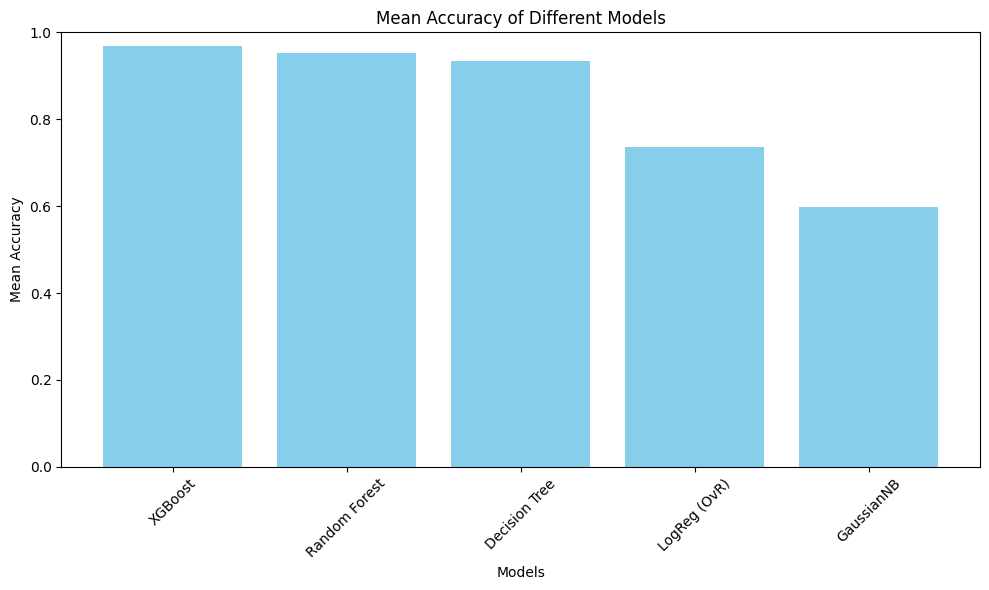

In [27]:
import matplotlib.pyplot as plt

# Models' names and their mean accuracy scores
models = ['XGBoost', 'Random Forest', 'Decision Tree', 'LogReg (OvR)',  'GaussianNB']
mean_scores = [np.mean(scores_xgb), np.mean(scores_rf), np.mean(scores_dt), np.mean(scores_ovr),  np.mean(scores_nb)]

plt.figure(figsize=(10, 6))
plt.bar(models, mean_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


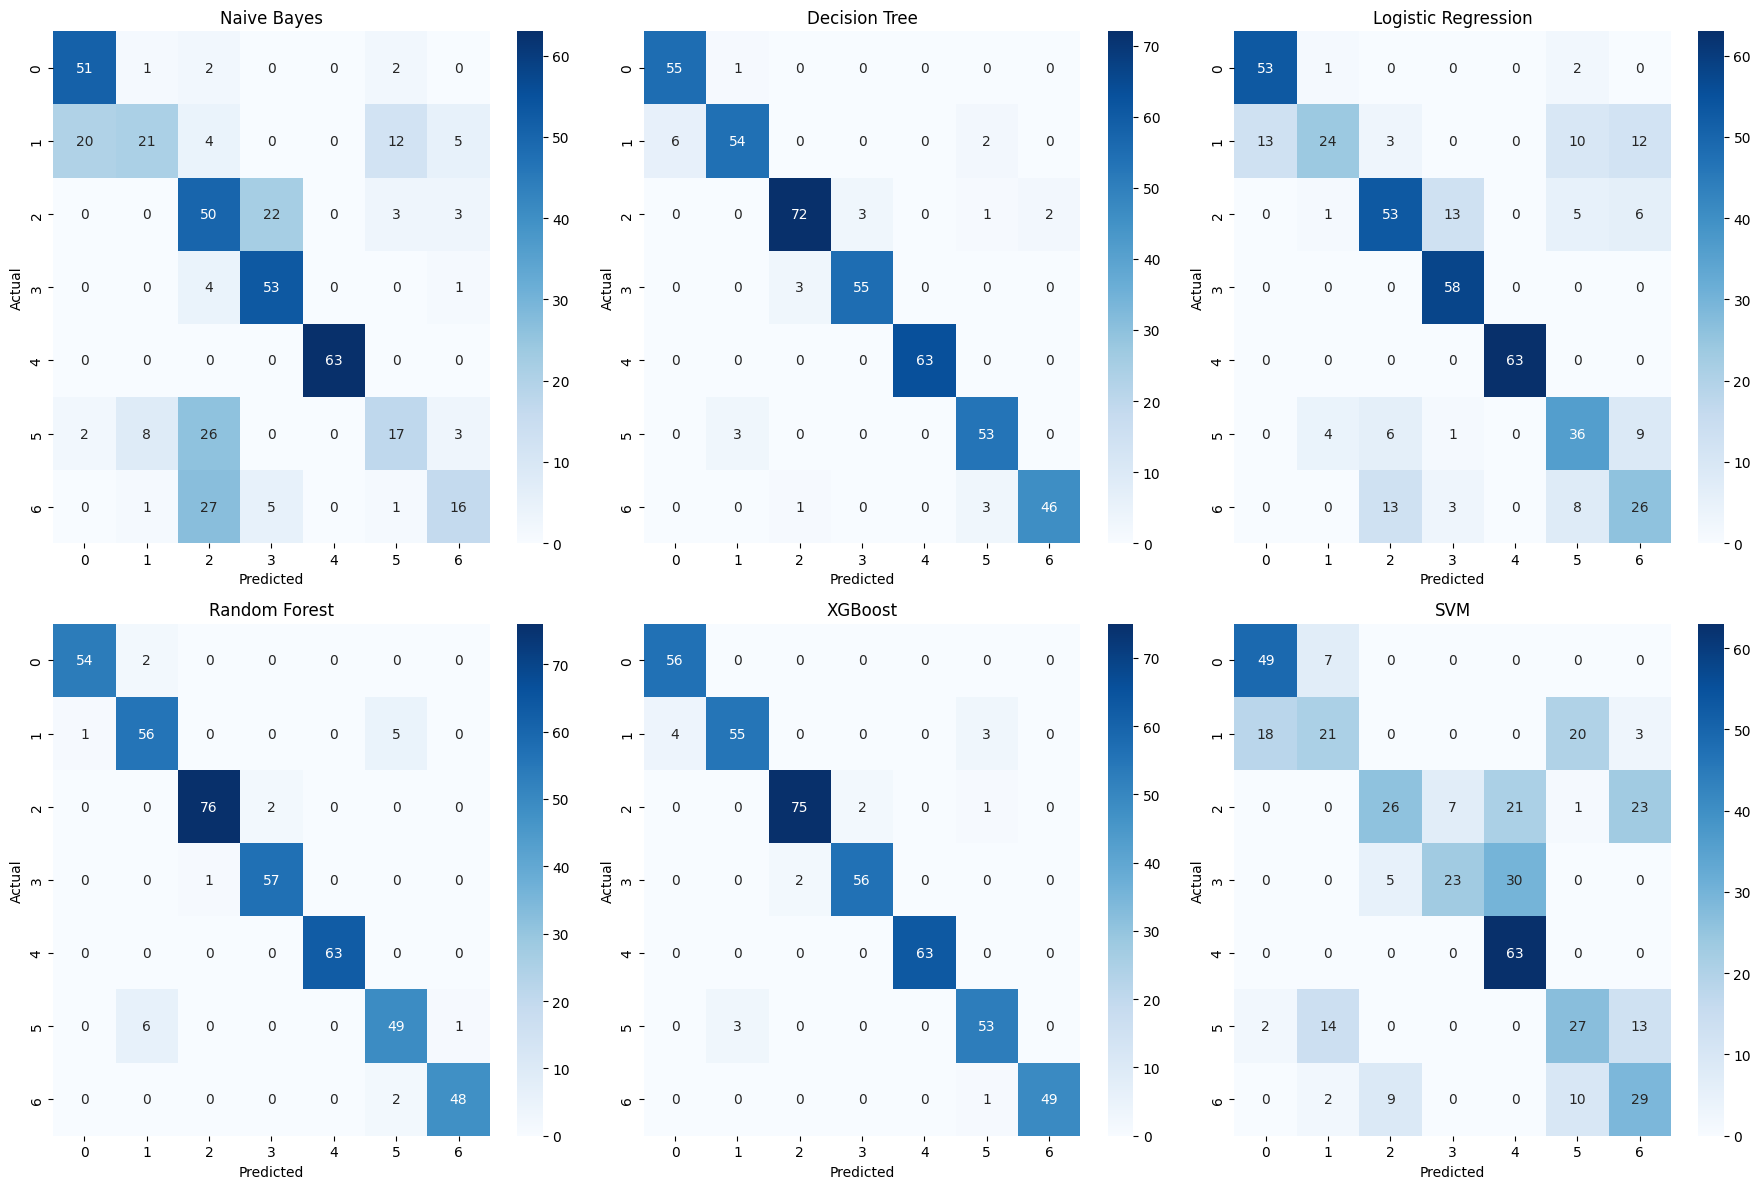

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Initialize a figure to contain subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Iterate over models and plot confusion matrix for each
for idx, (name, model) in enumerate(models.items()):
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(name)
    axes[idx//3, idx%3].set_xlabel('Predicted')
    axes[idx//3, idx%3].set_ylabel('Actual')

plt.tight_layout()
plt.show()


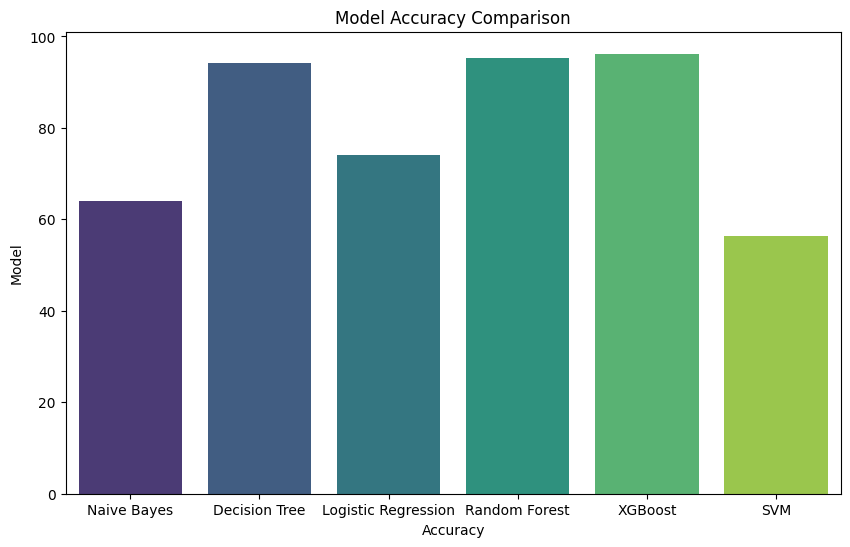

In [20]:
# Extract accuracies from results
accuracies = results_df['Accuracy']

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=(accuracies.values)*100, x=accuracies.index, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


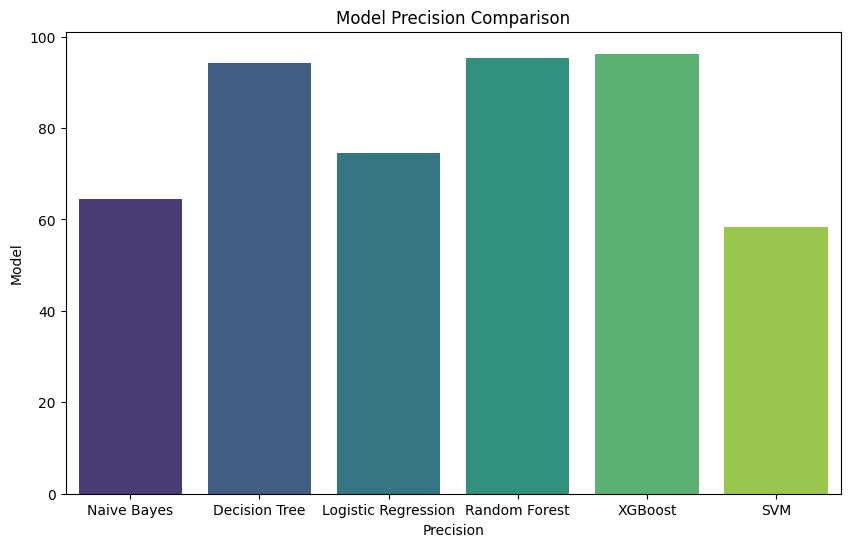

In [21]:
# Extract precision scores and model names
precisions = results_df['Precision']

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=(precisions.values)*100, x=precisions.index, palette="viridis")
plt.title("Model Precision Comparison")
plt.xlabel("Precision")
plt.ylabel("Model")
plt.show()

